In [322]:
#As part of this assignment, I am going to do the following steps
#Reading, Understanding, and visualizing the data
#Preaparing the data for modeling (train-test, split, rescaling)
#Training the model
#predictions and evaluation on the test set

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
data = pd.read_csv("day.csv")
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [324]:
#my target is cnt which is a continuous variable so I am good to go with linear regression :)
#Data set have both numerical and categorical values


In [325]:
data.shape

(730, 16)

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [327]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


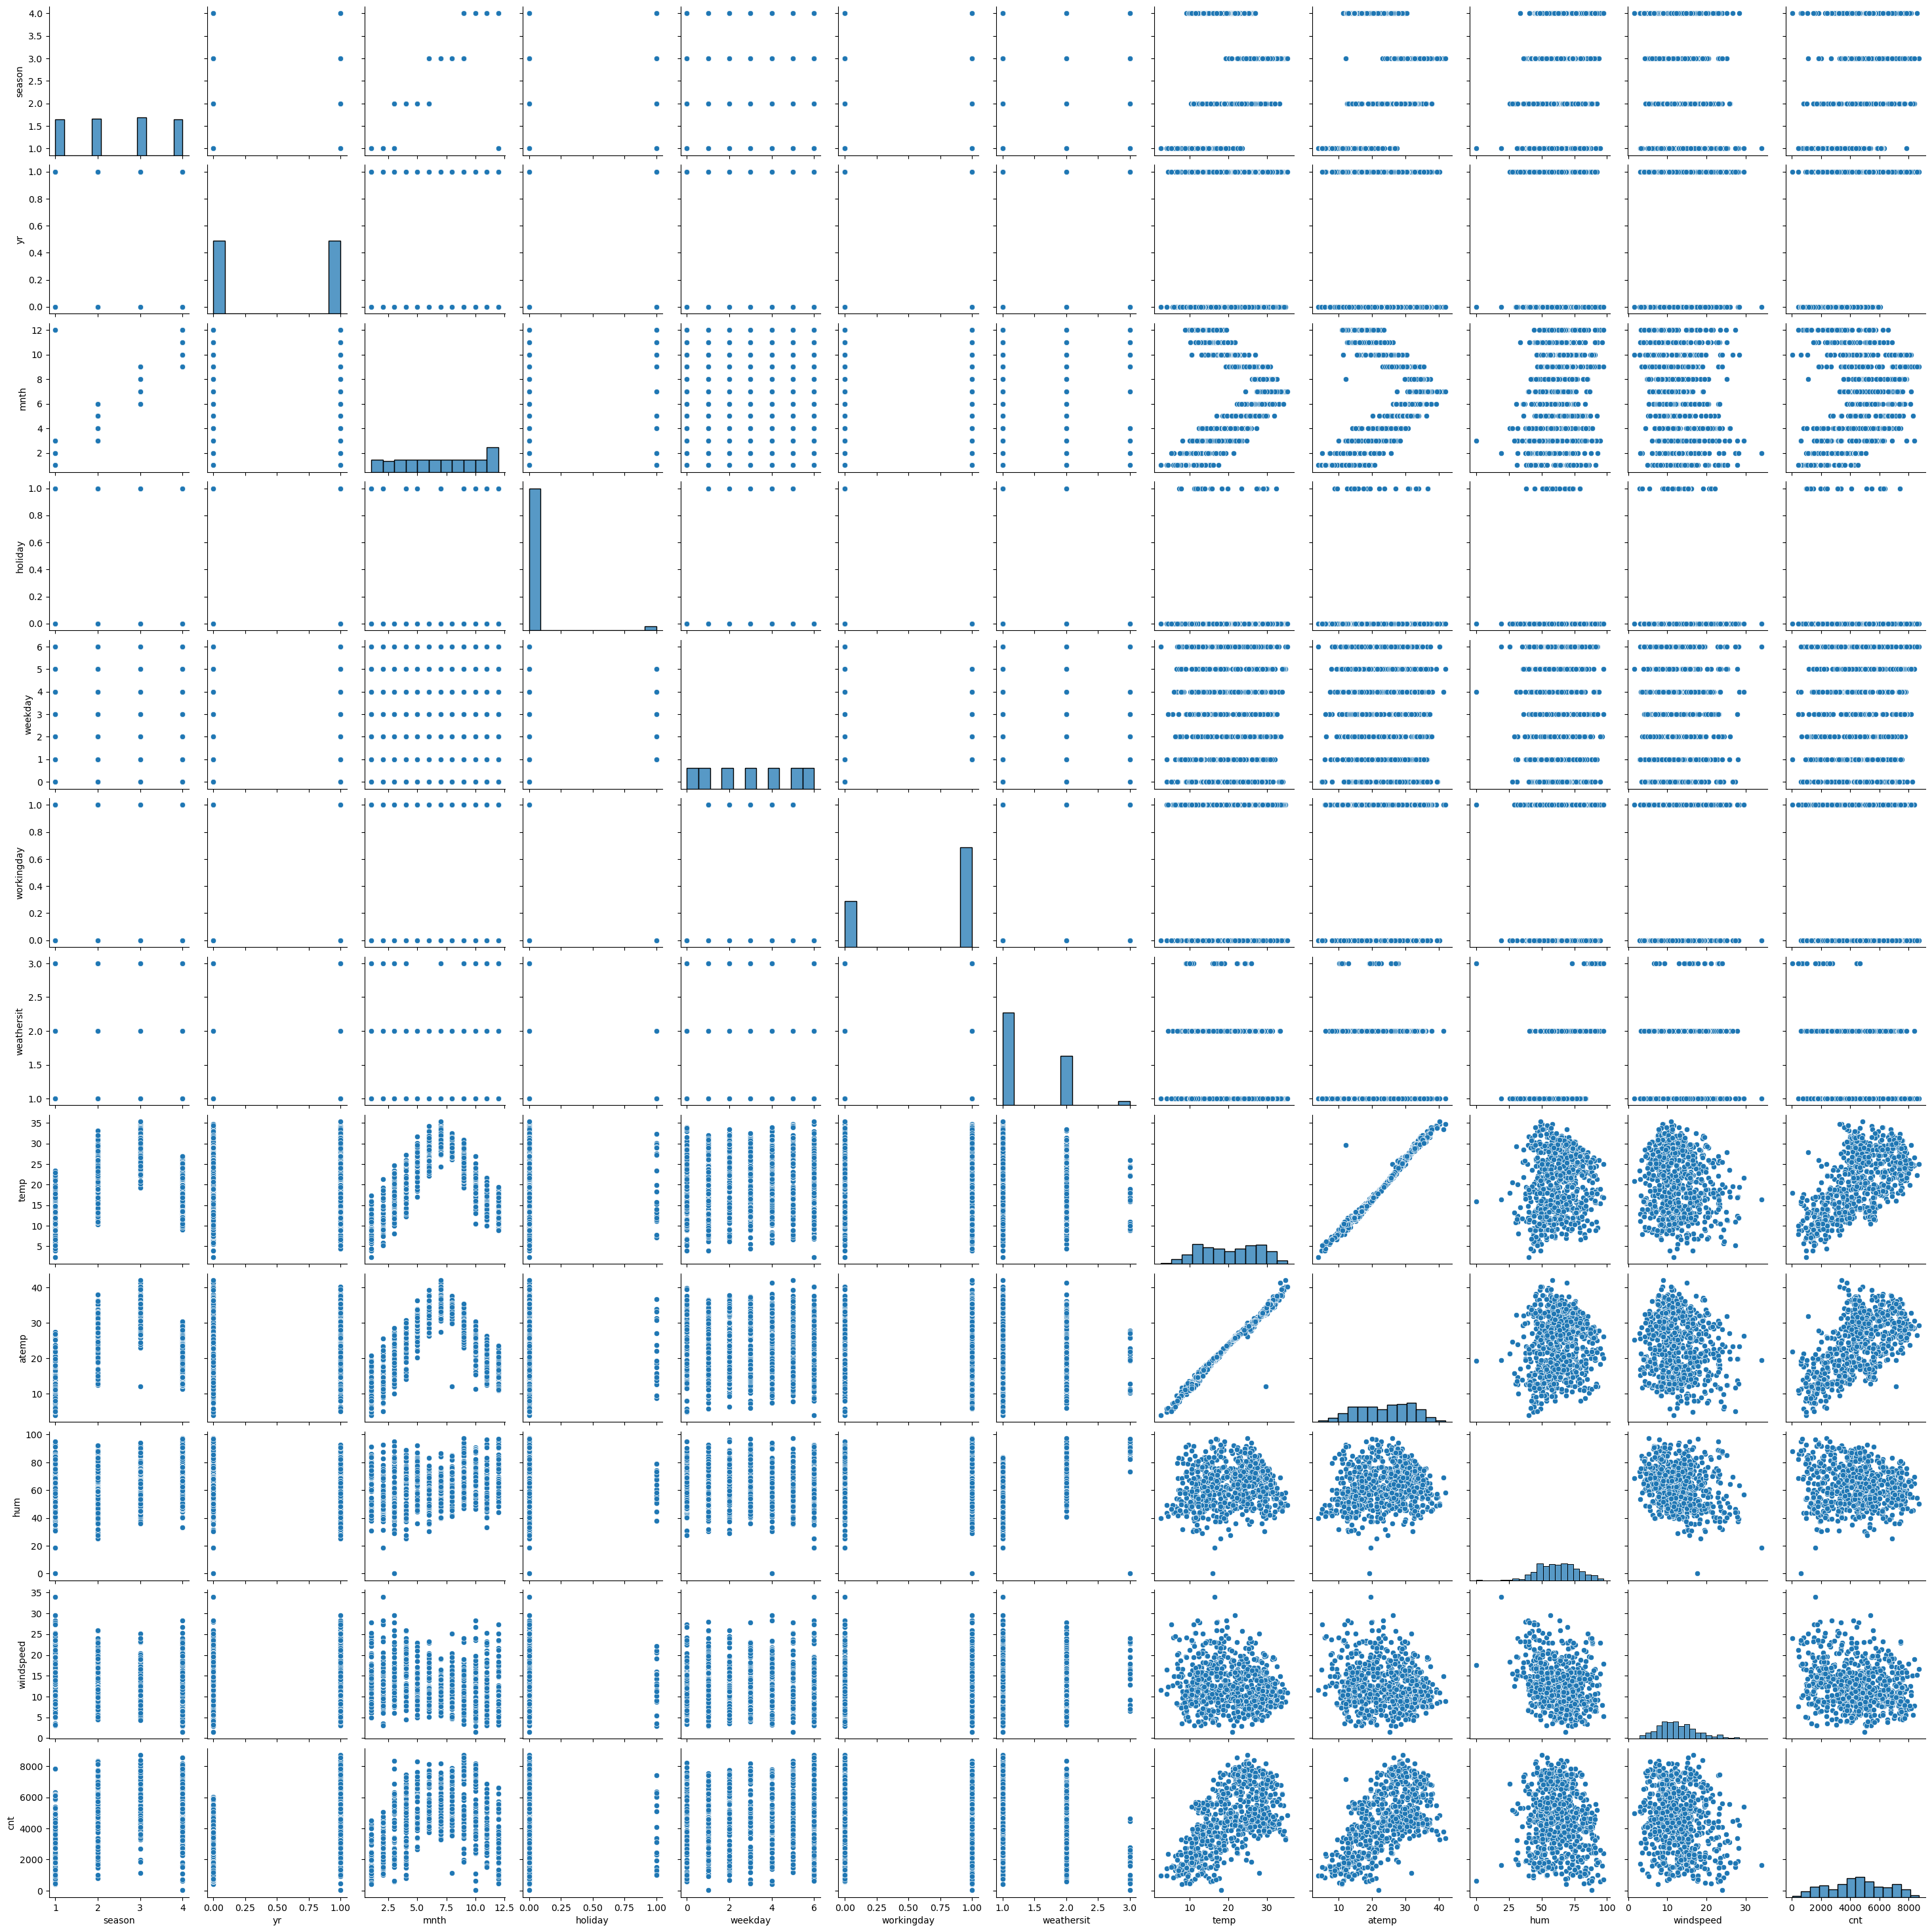

In [378]:
#visualizing
sns.pairplot(data)
plt.show()

<Axes: xlabel='holiday', ylabel='cnt'>

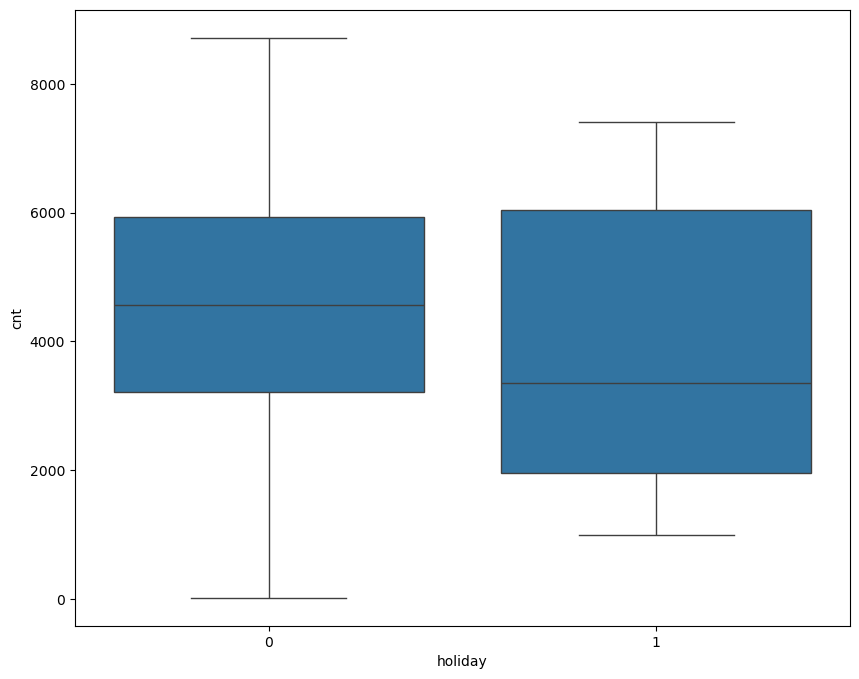

In [329]:
#visualize categorical variable
plt.figure(figsize=(10,8))
sns.boxplot(x='holiday',y='cnt',data=data)

<Axes: xlabel='weathersit', ylabel='cnt'>

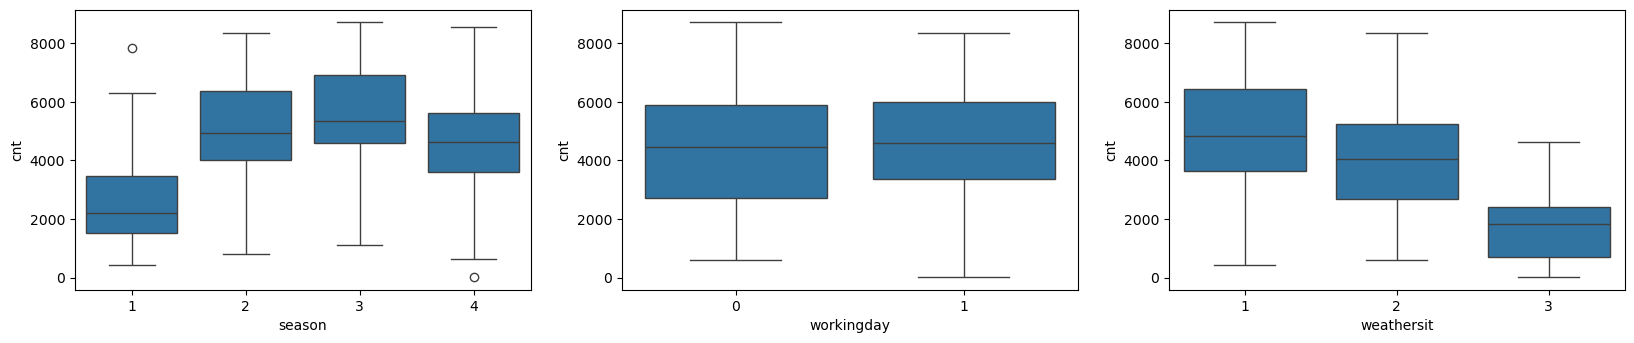

In [330]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=data)

In [331]:
#season 3 light snow significntly high median
#weathersit1 also have comparatively high median

In [332]:
#Data preparation
# year = pd.get_dummies(data['yr'],drop_first=True)
# year.head()

In [333]:
#split data set into training set
#i think date is not relevant so removing date from dataframe
#removing casual and registed because its directly dpende on dependent variable cnt like casual+registered =cnt
data = data.drop(columns=['dteday','instant','casual','registered'])
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [334]:
df_train,df_test = train_test_split(data,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)
df_train.head()

(510, 12)
(220, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,1,3,0,6,0,2,16.980847,20.6746,62.1250,10.792293,4066
728,1,1,12,0,0,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,2,1,4,0,6,0,2,15.443347,18.8752,48.9583,8.708325,4220
111,2,0,4,0,5,1,2,13.803347,16.0977,72.9583,14.707907,1683


In [335]:

from sklearn.preprocessing import OneHotEncoder

encodable_cols = ['season', 'mnth', 'weekday', 'weathersit']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
train_encoded = one_hot_encoder.fit_transform(df_train[encodable_cols])
df_train = pd.concat([df_train, train_encoded], axis=1).drop(columns=encodable_cols)

test_encoded = one_hot_encoder.transform(df_test[encodable_cols])
df_test = pd.concat([df_test, test_encoded], axis=1).drop(columns=encodable_cols)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [336]:
# # Scale all columns
# scaler = MinMaxScaler()
# df_train_scaled = scaler.fit_transform(df_train)

# # Convert the scaled data back to a DataFrame
# df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns)

# # Display the first few rows of the scaled DataFrame
# df_train.head()

In [337]:
# Modelling

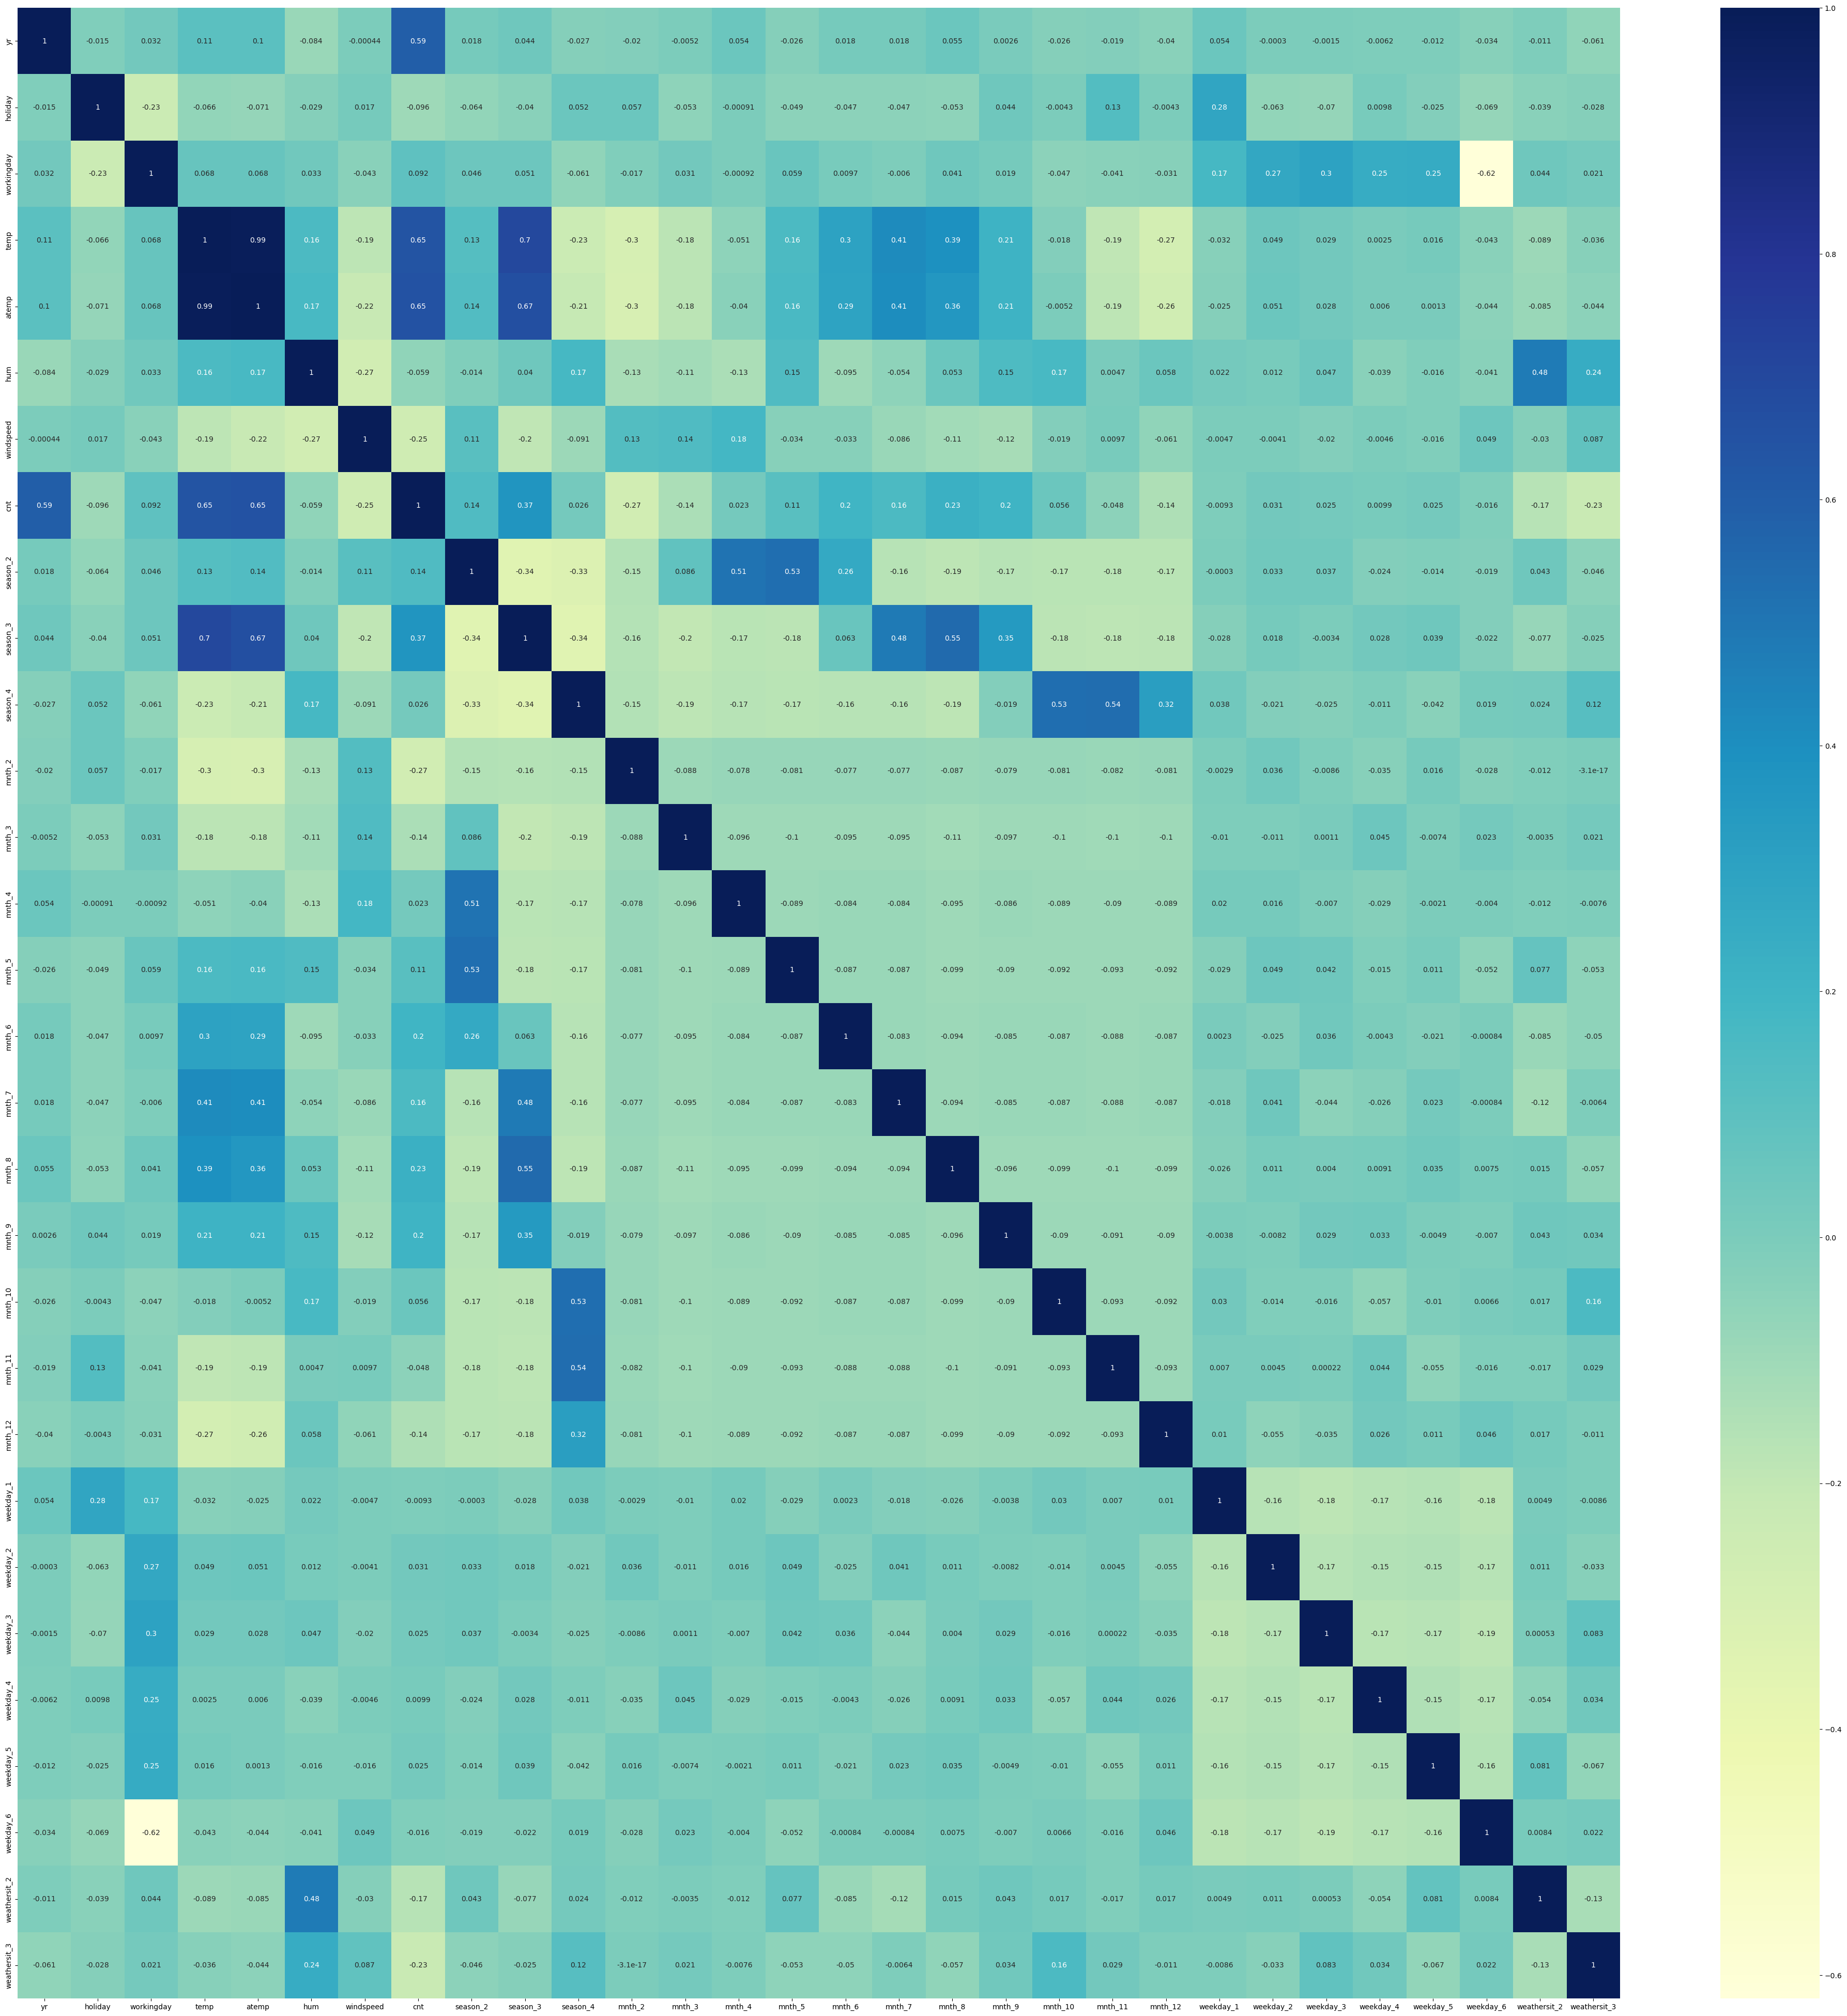

In [338]:
plt.figure(figsize = (50,50))
sns.heatmap(df_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [339]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [340]:
print("Columns in df_train:", df_train.columns)
if 'cnt' not in df_train.columns:
    raise KeyError("Column 'cnt' not found in df_train")

Columns in df_train: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [341]:
# X_train ,y_train
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [342]:
# Scale all columns
scaler = MinMaxScaler()
#X_train[:, :] = scaler.fit_transform(X_train)
X_train[X_train.columns] = scaler.fit_transform(X_train)
# Convert the scaled data back to a DataFrame
#X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the first few rows of the scaled DataFrame
#X_train.head()
X_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [343]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
728,1.0,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
111,0.0,0.0,1.0,0.345824,0.318819,0.751824,0.380981,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [344]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [345]:
# Now i am going to look into each variable 
#statical significance of variable


In [346]:
#add a constant since stat model does n't have a constant
X_train_sm = sm.add_constant(X_train)
#create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params

const           1550.371784
yr              2021.226532
holiday         -361.833782
workingday       380.295446
temp            3372.358553
atemp            513.220706
hum            -1321.319475
windspeed      -1595.886402
season_2         762.496394
season_3         394.222817
season_4        1324.967228
mnth_2           267.260736
mnth_3           561.665648
mnth_4           548.152828
mnth_5           770.153122
mnth_6           600.407709
mnth_7           264.302217
mnth_8           741.724157
mnth_9          1302.276169
mnth_10          615.197704
mnth_11          202.050858
mnth_12          163.321359
weekday_1        -87.453433
weekday_2        -59.765076
weekday_3         49.247288
weekday_4         15.928711
weekday_5        100.504174
weekday_6        471.270198
weathersit_2    -517.352886
weathersit_3   -2216.246019
dtype: float64

In [347]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.81e-180
Time:                        19:19:18   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1550.3718    264.722      5.857      0.000    1030.218    2070.526
yr            2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday       -361.8338    205.836     -1.758      0.079    -766.282      42.615
workingday     380.2954     81.511      4.666      0.000     220.134     540.457
temp          3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp          513.2207   1203.335      0.426      0.670   -1851.222    2877.663
hum          -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed    -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_2       762.4964    205.378      3.713      0.000     358.947    1166.046
season_3       394.2228    260.924      1.511      0.131    -118.469     906.915
season_4      1324.9672    225.858      5.866      0.000     881.178    1768.757
mnth_2         267.2607    179.487      1.489      0.137     -85.415     619.937
mnth_3         561.6656    194.584      2.886      0.004     179.326     944.006
mnth_4         548.1528    292.204      1.876      0.061     -26.002    1122.307
mnth_5         770.1531    314.895      2.446      0.015     151.414    1388.892
mnth_6         600.4077    338.005      1.776      0.076     -63.742    1264.557
mnth_7         264.3022    381.794      0.692      0.489    -485.888    1014.493
mnth_8         741.7242    363.976      2.038      0.042      26.544    1456.904
mnth_9        1302.2762    325.086      4.006      0.000     663.511    1941.041
mnth_10        615.1977    300.028      2.050      0.041      25.670    1204.726
mnth_11        202.0509    285.713      0.707      0.480    -359.350     763.452
mnth_12        163.3214    230.565      0.708      0.479    -289.717     616.360
weekday_1      -87.4534     84.654     -1.033      0.302    -253.791      78.884
weekday_2      -59.7651     97.074     -0.616      0.538    -250.506     130.976
weekday_3       49.2473     91.514      0.538      0.591    -130.570     229.064
weekday_4       15.9287     95.078      0.168      0.867    -170.890     202.748
weekday_5      100.5042     97.630      1.029      0.304     -91.330     292.339
weekday_6      471.2702    126.389      3.729      0.000     222.928     719.613
weathersit_2  -517.3529     90.743     -5.701      0.000    -695.654    -339.052
weathersit_3 -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     2.25e+15
===============

In [348]:
#calculate the VIF
vif =pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] =[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['vif']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF,vif
24,weekday_4,inf,inf
2,workingday,inf,inf
23,weekday_3,inf,inf
22,weekday_2,inf,inf
21,weekday_1,inf,inf
25,weekday_5,inf,inf
1,holiday,inf,inf
3,temp,446.423872,446.42
4,atemp,383.204653,383.20
5,hum,20.803910,20.80


In [349]:
#Let me try using RFE

In [350]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train,y_train)

In [351]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 5),
 ('mnth_4', False, 7),
 ('mnth_5', False, 6),
 ('mnth_6', False, 8),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 17),
 ('weekday_4', False, 18),
 ('weekday_5', False, 16),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [352]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [353]:
X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [354]:
# Now create model and check summary again using statsmodel

In [355]:
#add a constant since stat model does n't have a constant
X_train_rfe =  X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
#create first model
lm = sm.OLS(y_train,X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.20e-190
Time:                        19:19:18   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     497   BIC:                             8315.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2003.0659    235.131      8.519      0.000    1541.093    2465.039
yr            1990.2877     70.561     28.207      0.000    1851.653    2128.923
holiday       -804.7666    223.008     -3.609      0.000   -1242.922    -366.611
temp          4697.6873    191.279     24.559      0.000    4321.873    5073.502
hum          -1519.6970    325.691     -4.666      0.000   -2159.598    -879.796
windspeed    -1607.3098    222.914     -7.210      0.000   -2045.279   -1169.340
season_2       905.5729     94.543      9.578      0.000     719.820    1091.326
season_4      1275.5746     92.627     13.771      0.000    1093.585    1457.564
mnth_8         475.5053    141.715      3.355      0.001     197.070     753.941
mnth_9        1060.7402    140.773      7.535      0.000     784.157    1337.324
weekday_6      140.0781     96.795      1.447      0.148     -50.101     330.257
weathersit_2  -463.3020     91.209     -5.080      0.000    -642.504    -284.100
weathersit_3 -2041.5870    228.678     -8.928      0.000   -2490.881   -1592.293
==============================================================================
Omnibus:                       61.236   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.479
Skew:                          -0.675   Prob(JB):                     1.26e-28
Kurtosis:                       5.055   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
#calculate the VIF
vif =pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF,vif
3,hum,14.355971,14.36
2,temp,9.658570,9.66
4,windspeed,3.633749,3.63
10,weathersit_2,2.128459,2.13
0,yr,2.013149,2.01
5,season_2,1.825213,1.83
6,season_4,1.749152,1.75
7,mnth_8,1.587727,1.59
8,mnth_9,1.307885,1.31
9,weekday_6,1.185766,1.19


In [357]:
#year is having very high p value so removing it 
#X_train_rfe =  X_train[col]
X_train_rfe  = X_train_rfe.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
#create first model
lm = sm.OLS(y_train,X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.10e-186
Time:                        19:19:18   Log-Likelihood:                -4127.8
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1131.1429    145.663      7.765      0.000     844.952    1417.333
yr            2025.0362     71.616     28.276      0.000    1884.330    2165.742
holiday       -811.9986    227.606     -3.568      0.000   -1259.186    -364.811
temp          4508.1121    190.772     23.631      0.000    4133.294    4882.930
windspeed    -1318.2269    218.551     -6.032      0.000   -1747.623    -888.830
season_2       881.0049     96.345      9.144      0.000     691.712    1070.297
season_4      1189.2003     92.632     12.838      0.000    1007.202    1371.199
mnth_8         464.3704    144.620      3.211      0.001     180.229     748.512
mnth_9        1008.0745    143.216      7.039      0.000     726.692    1289.457
weekday_6      162.8044     98.668      1.650      0.100     -31.053     356.662
weathersit_2  -705.6478     76.524     -9.221      0.000    -855.998    -555.297
weathersit_3 -2453.7785    215.280    -11.398      0.000   -2876.748   -2030.809
==============================================================================
Omnibus:                       60.445   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.738
Skew:                          -0.673   Prob(JB):                     8.19e-28
Kurtosis:                       5.014   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
#calculate the VIF
vif =pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF,vif
2,temp,5.030699,5.03
3,windspeed,3.170294,3.17
0,yr,2.000511,2.00
4,season_2,1.815883,1.82
6,mnth_8,1.581603,1.58
9,weathersit_2,1.492770,1.49
5,season_4,1.488347,1.49
7,mnth_9,1.307206,1.31
8,weekday_6,1.181598,1.18
10,weathersit_3,1.081496,1.08


In [359]:
#year is having very high p value so removing it 
#X_train_rfe =  X_train[col]
X_train_rfe  = X_train_rfe.drop('weekday_6',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
#create first model
lm = sm.OLS(y_train,X_train_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.62e-187
Time:                        19:19:18   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     499   BIC:                             8327.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1158.2383    144.984      7.989      0.000     873.383    1443.093
yr            2021.4376     71.706     28.191      0.000    1880.555    2162.320
holiday       -839.4338    227.390     -3.692      0.000   -1286.193    -392.674
temp          4496.6820    190.975     23.546      0.000    4121.467    4871.897
windspeed    -1301.2697    218.686     -5.950      0.000   -1730.929    -871.611
season_2       879.7754     96.508      9.116      0.000     690.163    1069.388
season_4      1191.5878     92.781     12.843      0.000    1009.299    1373.877
mnth_8         470.5913    144.821      3.249      0.001     186.058     755.124
mnth_9        1010.8056    143.454      7.046      0.000     728.958    1292.653
weathersit_2  -705.2619     76.656     -9.200      0.000    -855.870    -554.654
weathersit_3 -2449.8560    215.638    -11.361      0.000   -2873.527   -2026.185
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
#calculate the VIF
vif =pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['VIF'],2)
vif=vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF,vif
2,temp,5.012840,5.01
3,windspeed,3.103226,3.10
0,yr,2.000292,2.00
4,season_2,1.815872,1.82
6,mnth_8,1.581198,1.58
8,weathersit_2,1.491031,1.49
5,season_4,1.483394,1.48
7,mnth_9,1.307124,1.31
9,weathersit_3,1.081314,1.08
1,holiday,1.036152,1.04


In [361]:
#residual ananlysis of trained data
print(X_train_sm.shape)
print(lm.params.shape)


(510, 11)
(11,)


In [362]:
y_train_cnt = lm.predict(X_train_sm)
print(y_train_cnt)

576    6500.802467
426    4131.445384
728    3418.937339
482    4888.117646
111    2392.053933
          ...     
578    7291.757518
53     1924.414591
350    2198.805084
79     2723.685502
520    5585.275011
Length: 510, dtype: float64


In [363]:
#error check normal
#eror vs cnt


<Axes: ylabel='Density'>

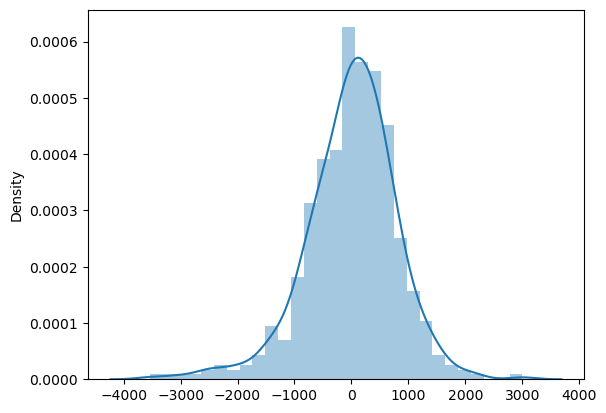

In [364]:
res = y_train -y_train_cnt
sns.distplot(res)

In [365]:
#prediction and evaluation on test data

In [366]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [367]:
# X_test ,y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()
#y_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [368]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [369]:
#scaler = MinMaxScaler()
#X_train[:, :] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)
# Convert the scaled data back to a DataFrame
#X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the first few rows of the scaled DataFrame
#X_train.head()
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,1.0,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,1.0,0.817246,0.741471,0.314298,0.537414,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [370]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [371]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [372]:
common_columns = X_train_rfe.columns.intersection(X_test.columns)

# Select only the common columns from X_test_sm
X_test= X_test[common_columns]

# Display the columns of the filtered DataFrame
print(X_test.columns)

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [373]:


X_test_sm=sm.add_constant(X_test)


In [375]:
 y_test_pred = lm.predict(X_test_sm)

In [376]:
#evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7935224695104377

In [377]:
print(y_test_pred)

184    3244.216838
535    7912.512550
299    3511.810101
221    5151.346702
152    5013.587392
          ...     
702    6337.307984
127    4576.544868
640    6950.903170
72     2384.442519
653    6272.647676
Length: 220, dtype: float64


In [ ]:
#Here my final prediction :) 

cnt = yr*2021.4376 + holiday*-839.4338 + temp*4496.6820 + windspeed*-1301.2697 + season_2*879.7754 + season_4*1191.5878 + mnth_8*470.5913 + mnth_9*1010.8056 + weathersit_2*-705.2619 weathersit_3